In [1]:
#A variation on mission based clustering. What happens if we try all metrics? Or headlines?
exec(open("data_prep/subnat_data_import.py").read()) 
from data_prep.subnat_data_clean import *

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#Get the metrics which are headline or supporting metrics for each mission.
#Use the 'top' headline as 1st entry, as this is what gets used for ranking clusters.
all_missions = [gva, weekly_pay, employ_rate, gdi, 
                travel_car, travel_bike, travel_public, 
                broadband, mobile4g,
                gcses, good_schools, lit_5, maths_5, comm_5,
                app_start, app_completion,
                male_hle, female_hle, smoking, adult_obesity, child_obesity,
                satisfaction, anxiety, worthwhile, happiness]

#Use apprecenticeship completion rate to normalise approximately by population before looking at headlines.
app_rate = app_completion.merge(app_start, on="AREACD", how='inner')
app_rate['Value'] = app_rate['Value_x']/app_rate['Value_y']
app_rate['Indicator'] = 'Approx apprenticeship completion rate'
app_rate.pop('Value_x')
app_rate = app_rate[['AREACD', 'Indicator', 'Value']]

headline_one_per_mission = [gva, travel_car, broadband, gcses, app_rate, female_hle, satisfaction]                
#Try omitting transport as that seems to have most NAs
headline_one_per_mission_no_transport = [gva, broadband, app_rate, gcses, female_hle, satisfaction]                

In [3]:
all_missions = clean_groups(all_missions)
headline_one_per_mission = clean_groups(headline_one_per_mission)
headline_one_per_mission_nt = clean_groups(headline_one_per_mission_no_transport)

In [4]:
#Do the clustering.
from cluster_analysis.cluster_functions import *
clustering_model = make_clustering_model()

In [5]:
#Convert missions to wide format
table_all = metrics_to_table(all_missions)
table_headline = metrics_to_table(headline_one_per_mission)
table_headline_nt = metrics_to_table(headline_one_per_mission_nt)


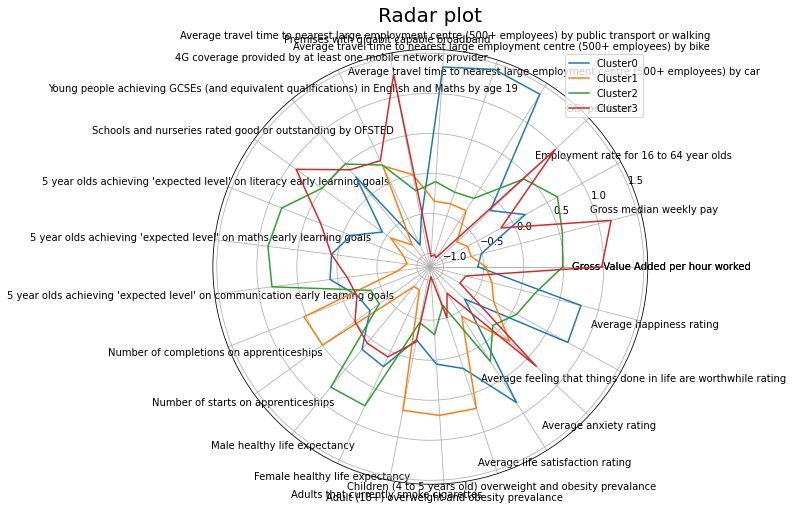

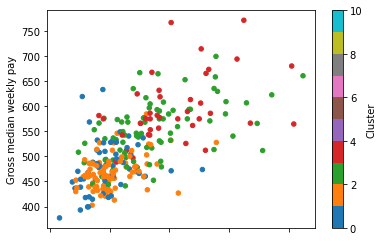

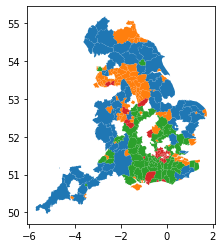

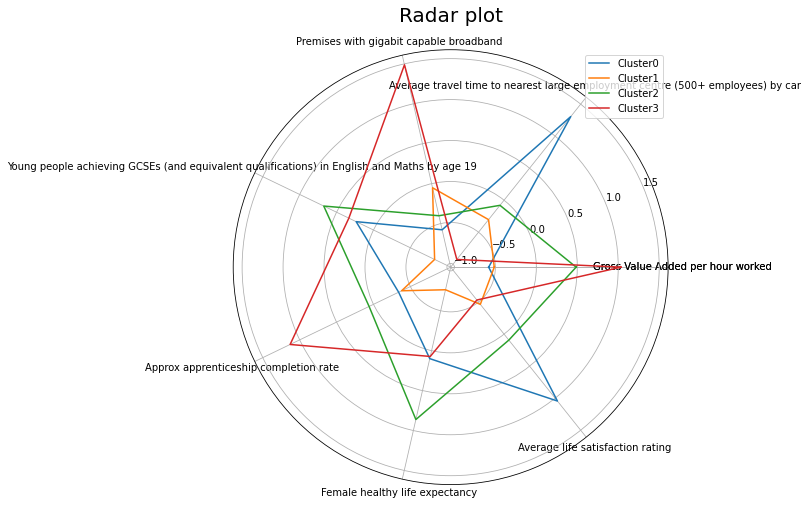

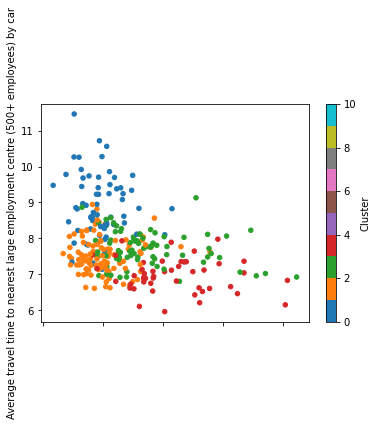

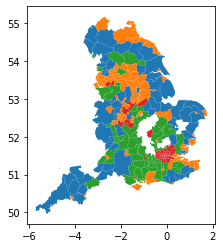

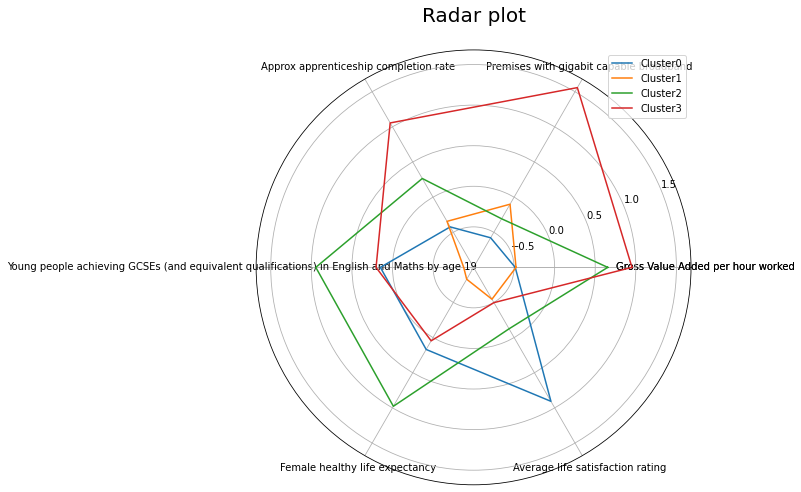

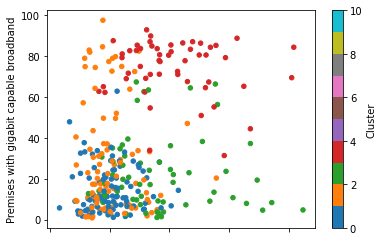

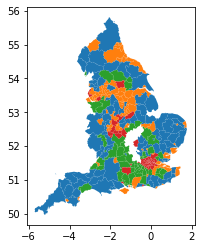

In [6]:
#Generate groups of clusters
clusters_all = clusters_and_plots(table_all, clustering_model, show_plots=True)
clusters_headline = clusters_and_plots(table_headline, clustering_model, show_plots=True)
clusters_headline_nt = clusters_and_plots(table_headline_nt, clustering_model, show_plots=True)
